In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical

In [ ]:
data_path = r"C:\Users\User\Desktop\CAPSTONE\NeuralNetw\CatDog\data"

In [3]:
img_size = (128, 128)
batch_size = 32

In [4]:
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

In [5]:
train_gen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=25,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    zoom_range=0.25,
    horizontal_flip=True,
    brightness_range=[0.7, 1.3],
    fill_mode='nearest',
    validation_split=0.2
)

val_gen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)


In [6]:
train_data = train_gen.flow_from_directory(
    data_path,
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

val_data = val_gen.flow_from_directory(
    data_path,
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)


Found 20000 images belonging to 2 classes.
Found 4998 images belonging to 2 classes.


In [7]:
from tensorflow.keras import regularizers

model = keras.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', padding='same',
                  kernel_regularizer=regularizers.l2(0.001),
                  input_shape=(128,128,3)),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),

    layers.Conv2D(64, (3,3), activation='relu', padding='same',
                  kernel_regularizer=regularizers.l2(0.001)),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),

    layers.Conv2D(128, (3,3), activation='relu', padding='same',
                  kernel_regularizer=regularizers.l2(0.001)),
    layers.BatchNormalization(),
    layers.Dropout(0.4),
    layers.MaxPooling2D(),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),

    layers.Dense(1, activation='sigmoid')
])


c:\Users\User\Desktop\CAPSTONE\caps\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
lr = keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.3,
    patience=2,
    min_lr=1e-6
)

early = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=4,
    restore_best_weights=True
)


In [16]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(1e-4),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    train_data,
    epochs=25,
    validation_data=val_data,
    callbacks=[lr, early]
)


Epoch 1/25
346/625 ━━━━━━━━━━━━━━━━━━━━ 1:46 381ms/step - accuracy: 0.5754 - loss: 0.9759

c:\Users\User\Desktop\CAPSTONE\caps\Lib\site-packages\PIL\TiffImagePlugin.py:949: UserWarning: Truncated File Read
  warnings.warn(str(msg))


625/625 ━━━━━━━━━━━━━━━━━━━━ 267s 425ms/step - accuracy: 0.6076 - loss: 0.8078 - val_accuracy: 0.6507 - val_loss: 0.7435 - learning_rate: 1.0000e-04
Epoch 2/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 108s 173ms/step - accuracy: 0.6585 - loss: 0.7355 - val_accuracy: 0.6695 - val_loss: 0.7091 - learning_rate: 1.0000e-04
Epoch 3/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 108s 173ms/step - accuracy: 0.6768 - loss: 0.7101 - val_accuracy: 0.7253 - val_loss: 0.6543 - learning_rate: 1.0000e-04
Epoch 4/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 107s 172ms/step - accuracy: 0.6998 - loss: 0.6804 - val_accuracy: 0.7637 - val_loss: 0.6012 - learning_rate: 1.0000e-04
Epoch 5/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 108s 173ms/step - accuracy: 0.7217 - loss: 0.6507 - val_accuracy: 0.7119 - val_loss: 0.6939 - learning_rate: 1.0000e-04
Epoch 6/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 108s 172ms/step - accuracy: 0.7343 - loss: 0.6318 - val_accuracy: 0.7885 - val_loss: 0.5454 - learning_rate: 1.0000e-04
Epoch 7/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 112s 178ms/

In [17]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128, 128, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64, 64, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 32, 32, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     4,194,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,865,221 (49.08 MB)

 Trainable params: 4,288,257 (16.36 MB)

 Non-trainable params: 448 (1.75 KB)

 Optimizer params: 8,576,516 (32.72 MB)

In [18]:
# history = model.fit(
#     train_data,
#     epochs=10,
#     validation_data=val_data
# )

In [19]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

In [20]:
loss = history.history['loss']
val_loss = history.history['val_loss']

In [ ]:
epochs_range = range(10)

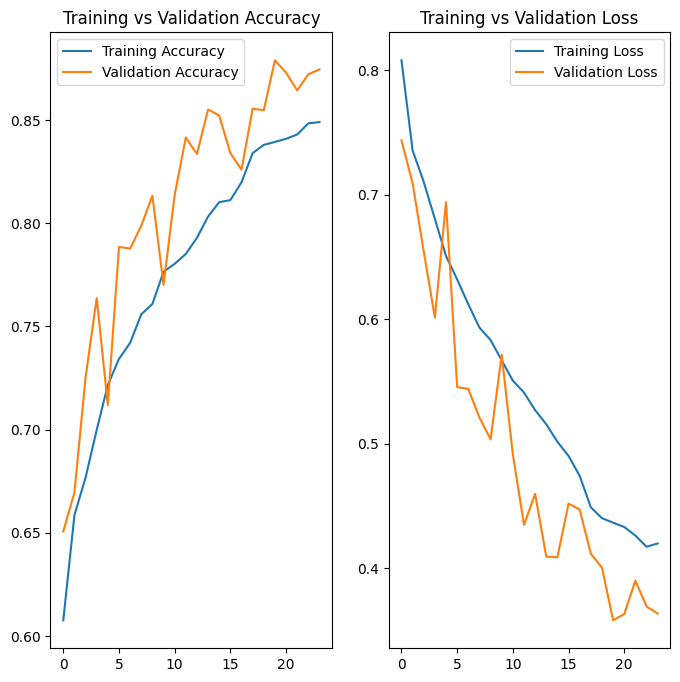

In [ ]:

epochs_range = range(len(acc))

plt.figure(figsize=(8,8))

plt.subplot(1,2,1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend()
plt.title("Training vs Validation Accuracy")

plt.subplot(1,2,2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend()
plt.title("Training vs Validation Loss")

plt.show()

In [25]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [ ]:
img = load_img(r"C:\Users\User\Desktop\CAPSTONE\NeuralNetw\MaskDetection\dog.png",
               target_size=(128,128))

In [43]:
img = img_to_array(img)
img = img.reshape(1,128,128,3)
img = img/255.0

In [44]:
prediction = model.predict(img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


In [45]:
prediction = model.predict(img)[0][0]

if prediction > 0.5:
    print("DOG")
else:
    print("CAT")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
CAT
